In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random


%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


Inciso 1: Use los mismos conjuntos de entrenamiento y prueba que usó para los árboles de decisión en la hoja de trabajo anterior. 

In [4]:
datos = pd.read_csv("train.csv", encoding="latin1")

numericas = datos.select_dtypes(include='number')

numericas = numericas.dropna(axis=0)
random.seed(42)

print(numericas)
Y = numericas.pop("SalePrice")
X = numericas



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,train_size=0.7)



        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

Inciso 2: Elabore un árbol de regresión para predecir el precio de las casas usando todas las variables. 

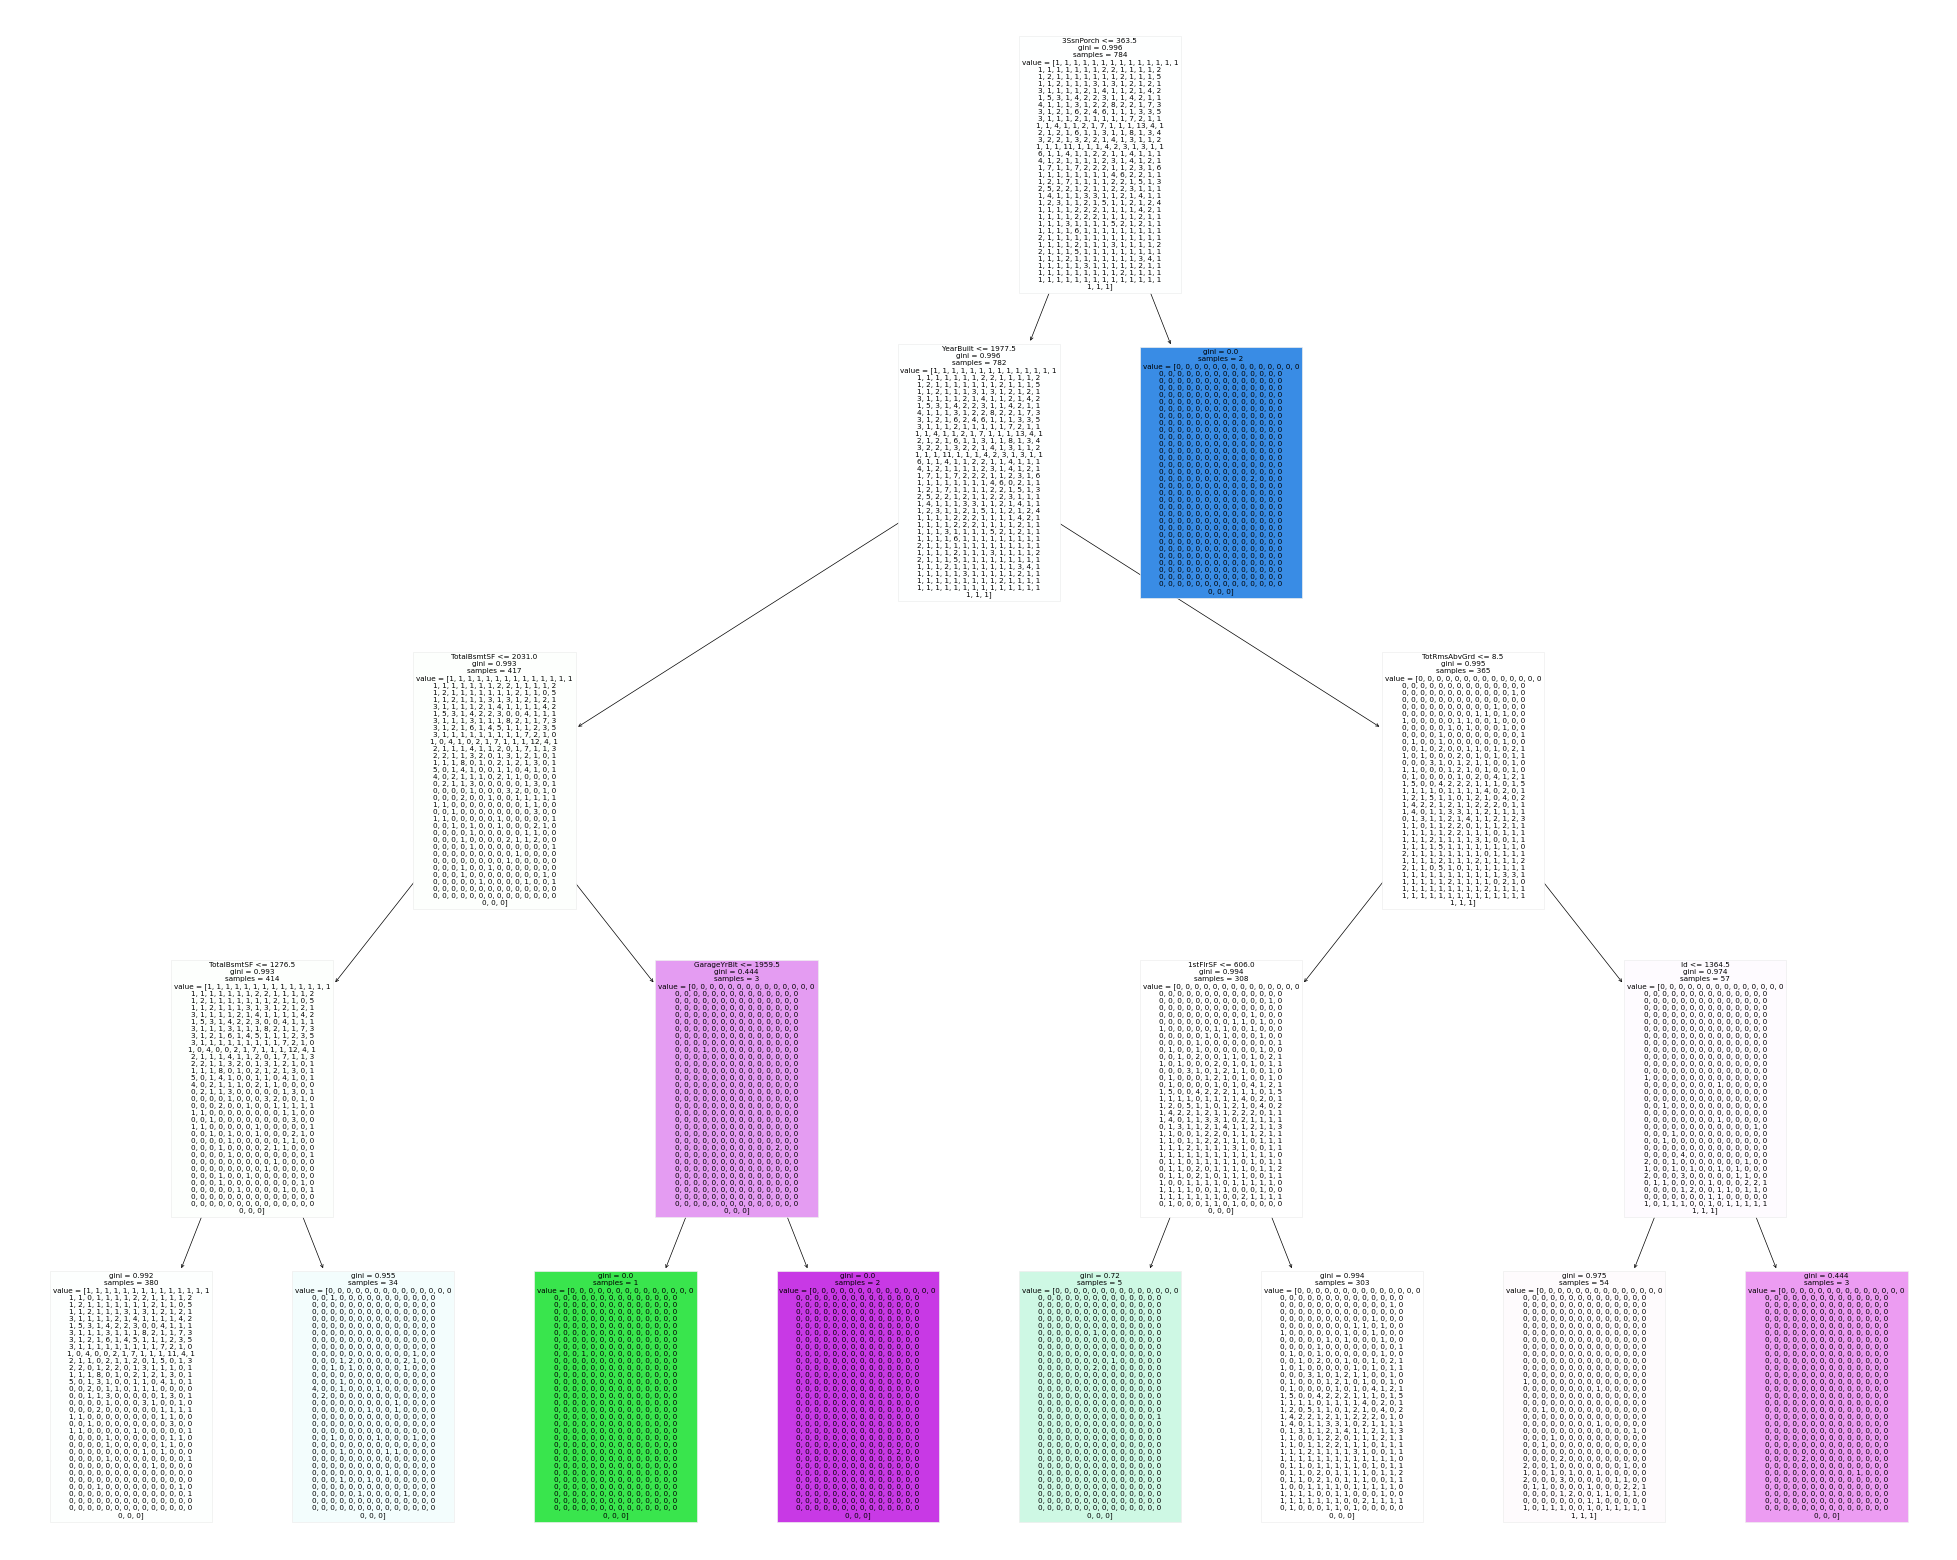

In [20]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42 ) 
arbol = arbol.fit(X_train, y_train) 

text_representation = tree.export_text(arbol)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arbol,feature_names=X.columns, filled=True)

In [21]:
print(text_representation)


|--- feature_31 <= 363.50
|   |--- feature_6 <= 1977.50
|   |   |--- feature_12 <= 2031.00
|   |   |   |--- feature_12 <= 1276.50
|   |   |   |   |--- class: 140000
|   |   |   |--- feature_12 >  1276.50
|   |   |   |   |--- class: 167000
|   |   |--- feature_12 >  2031.00
|   |   |   |--- feature_25 <= 1959.50
|   |   |   |   |--- class: 137900
|   |   |   |--- feature_25 >  1959.50
|   |   |   |   |--- class: 244000
|   |--- feature_6 >  1977.50
|   |   |--- feature_23 <= 8.50
|   |   |   |--- feature_13 <= 606.00
|   |   |   |   |--- class: 151000
|   |   |   |--- feature_13 >  606.00
|   |   |   |   |--- class: 174000
|   |   |--- feature_23 >  8.50
|   |   |   |--- feature_0 <= 1364.50
|   |   |   |   |--- class: 290000
|   |   |   |--- feature_0 >  1364.50
|   |   |   |   |--- class: 250000
|--- feature_31 >  363.50
|   |--- class: 180500



# Inciso 3: Úselo para predecir y analice el resultado. ¿Qué tal lo hizo?

In [33]:
y_pred = arbol.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))

Accuracy: 0.008902077151335312
Precision: 0.00027475546763380587
Recall:  0.008902077151335312


# Inciso 4: Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol. ¿Cuál es el mejor modelo para predecir el precio de las casas?


Accuracy: 0.002967359050445104
Precision: 0.00034504175005175625
Recall:  0.002967359050445104


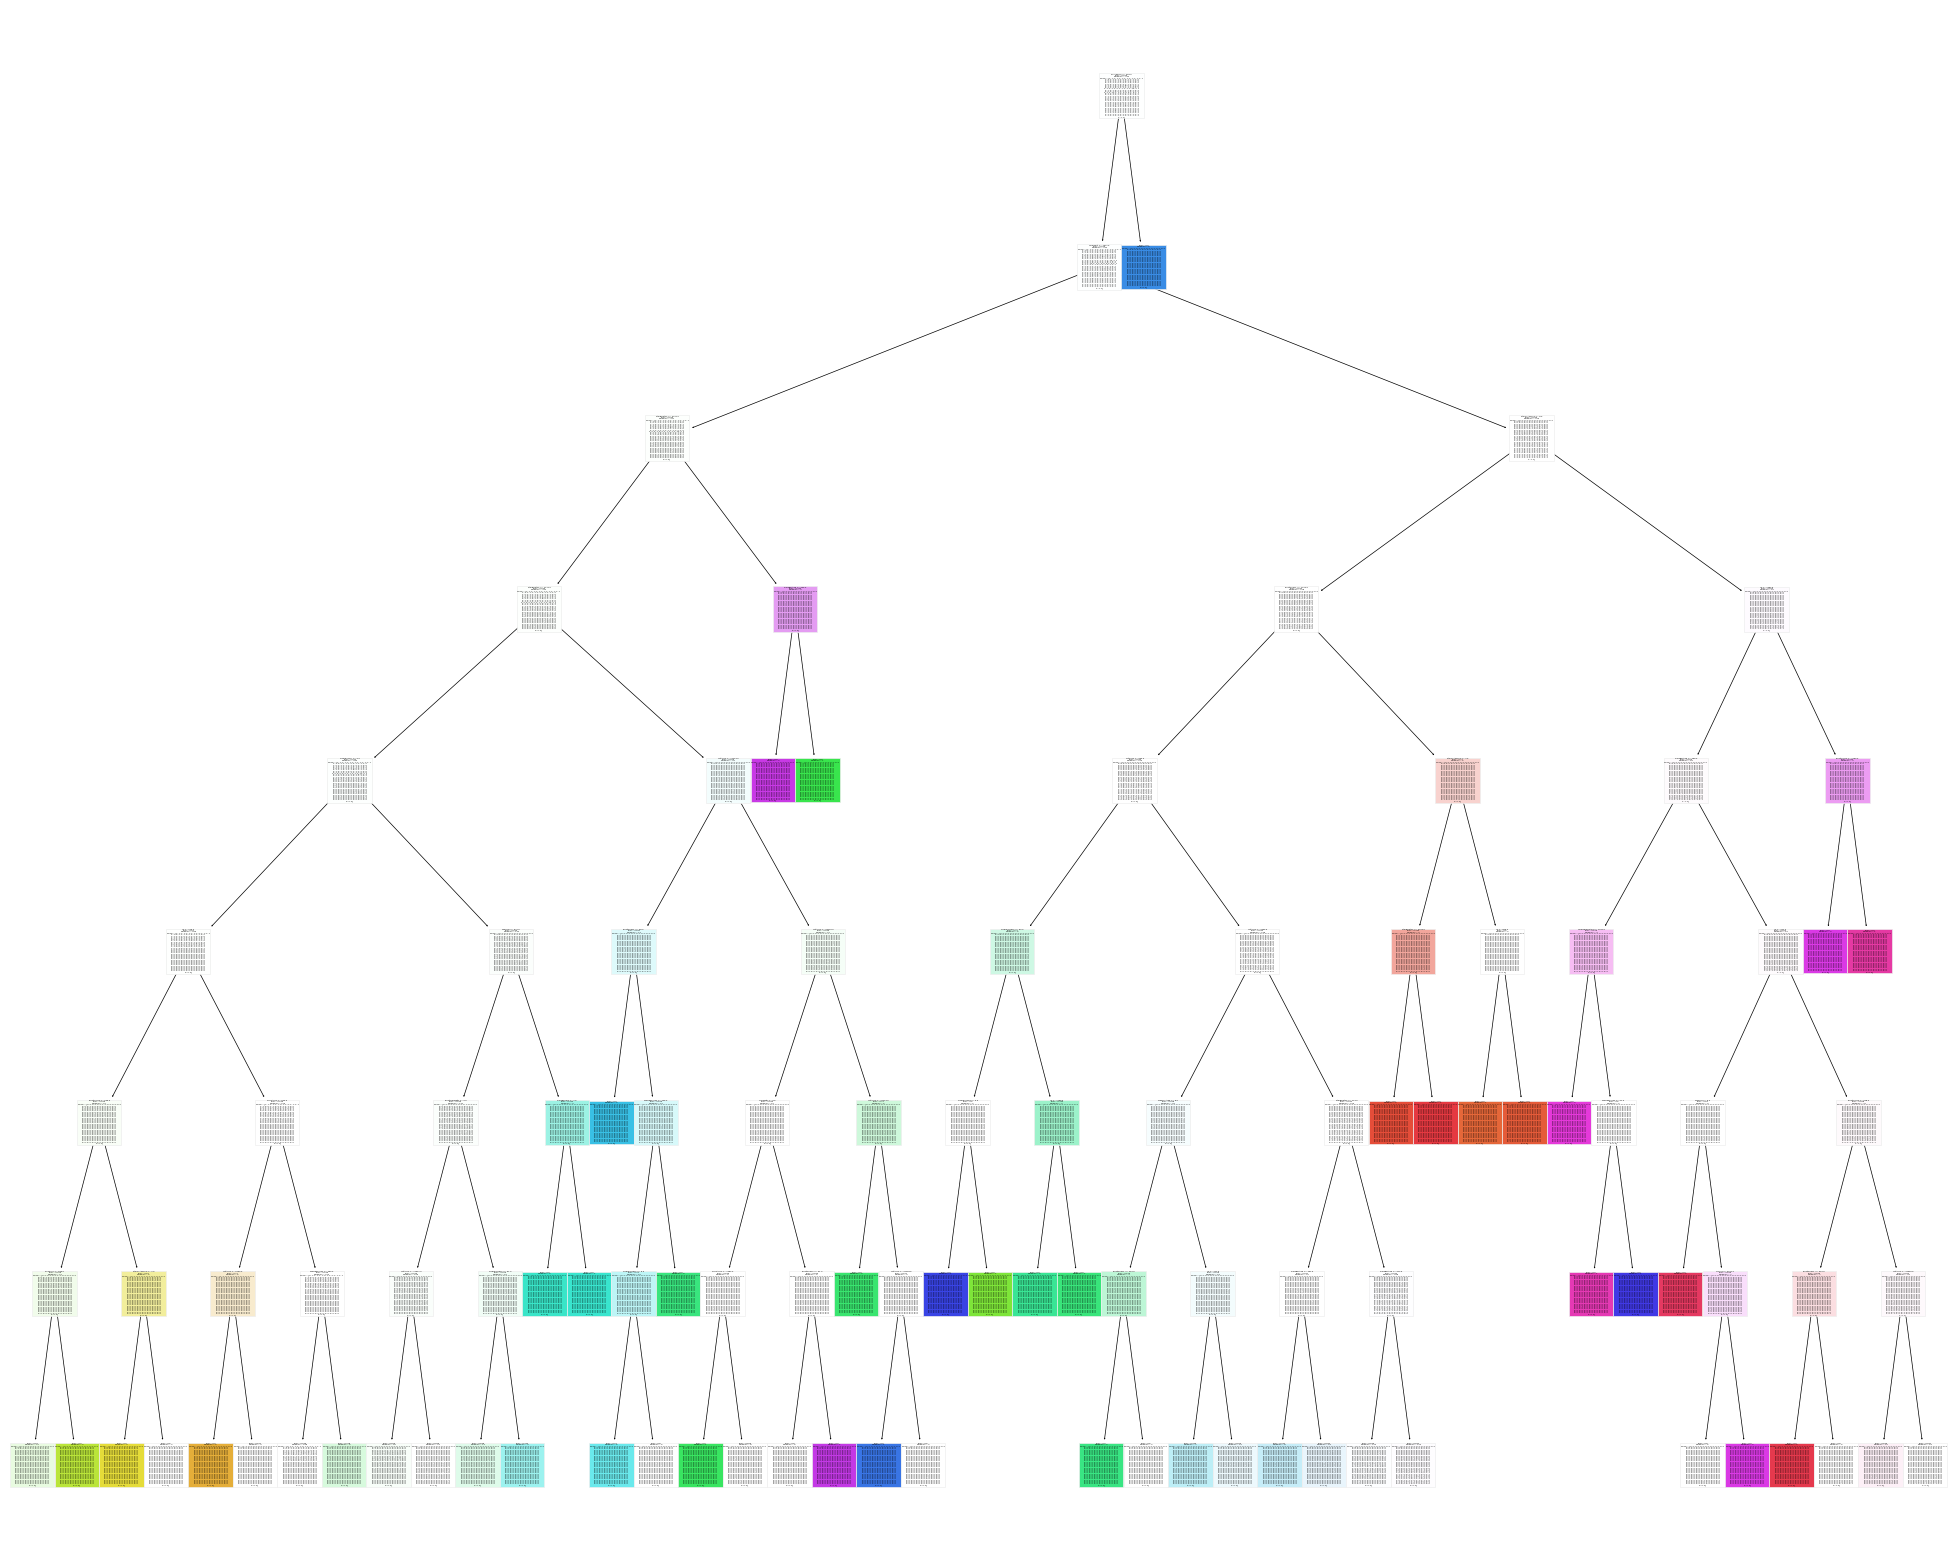

In [52]:
test_arbol1 = DecisionTreeClassifier(max_depth=8, random_state=42 ) 
test_arbol1 = test_arbol1.fit(X_train, y_train) 

text_representation = tree.export_text(test_arbol1)

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(arbol,feature_names=X.columns, filled=True)

y_pred1 = test_arbol1.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print ("Precision:", metrics.precision_score(y_test,y_pred1,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred1,average='weighted', zero_division=0))

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(test_arbol1,feature_names=X.columns, filled=True)

Accuracy: 0.002967359050445104
Precision: 0.000741839762611276
Recall:  0.002967359050445104


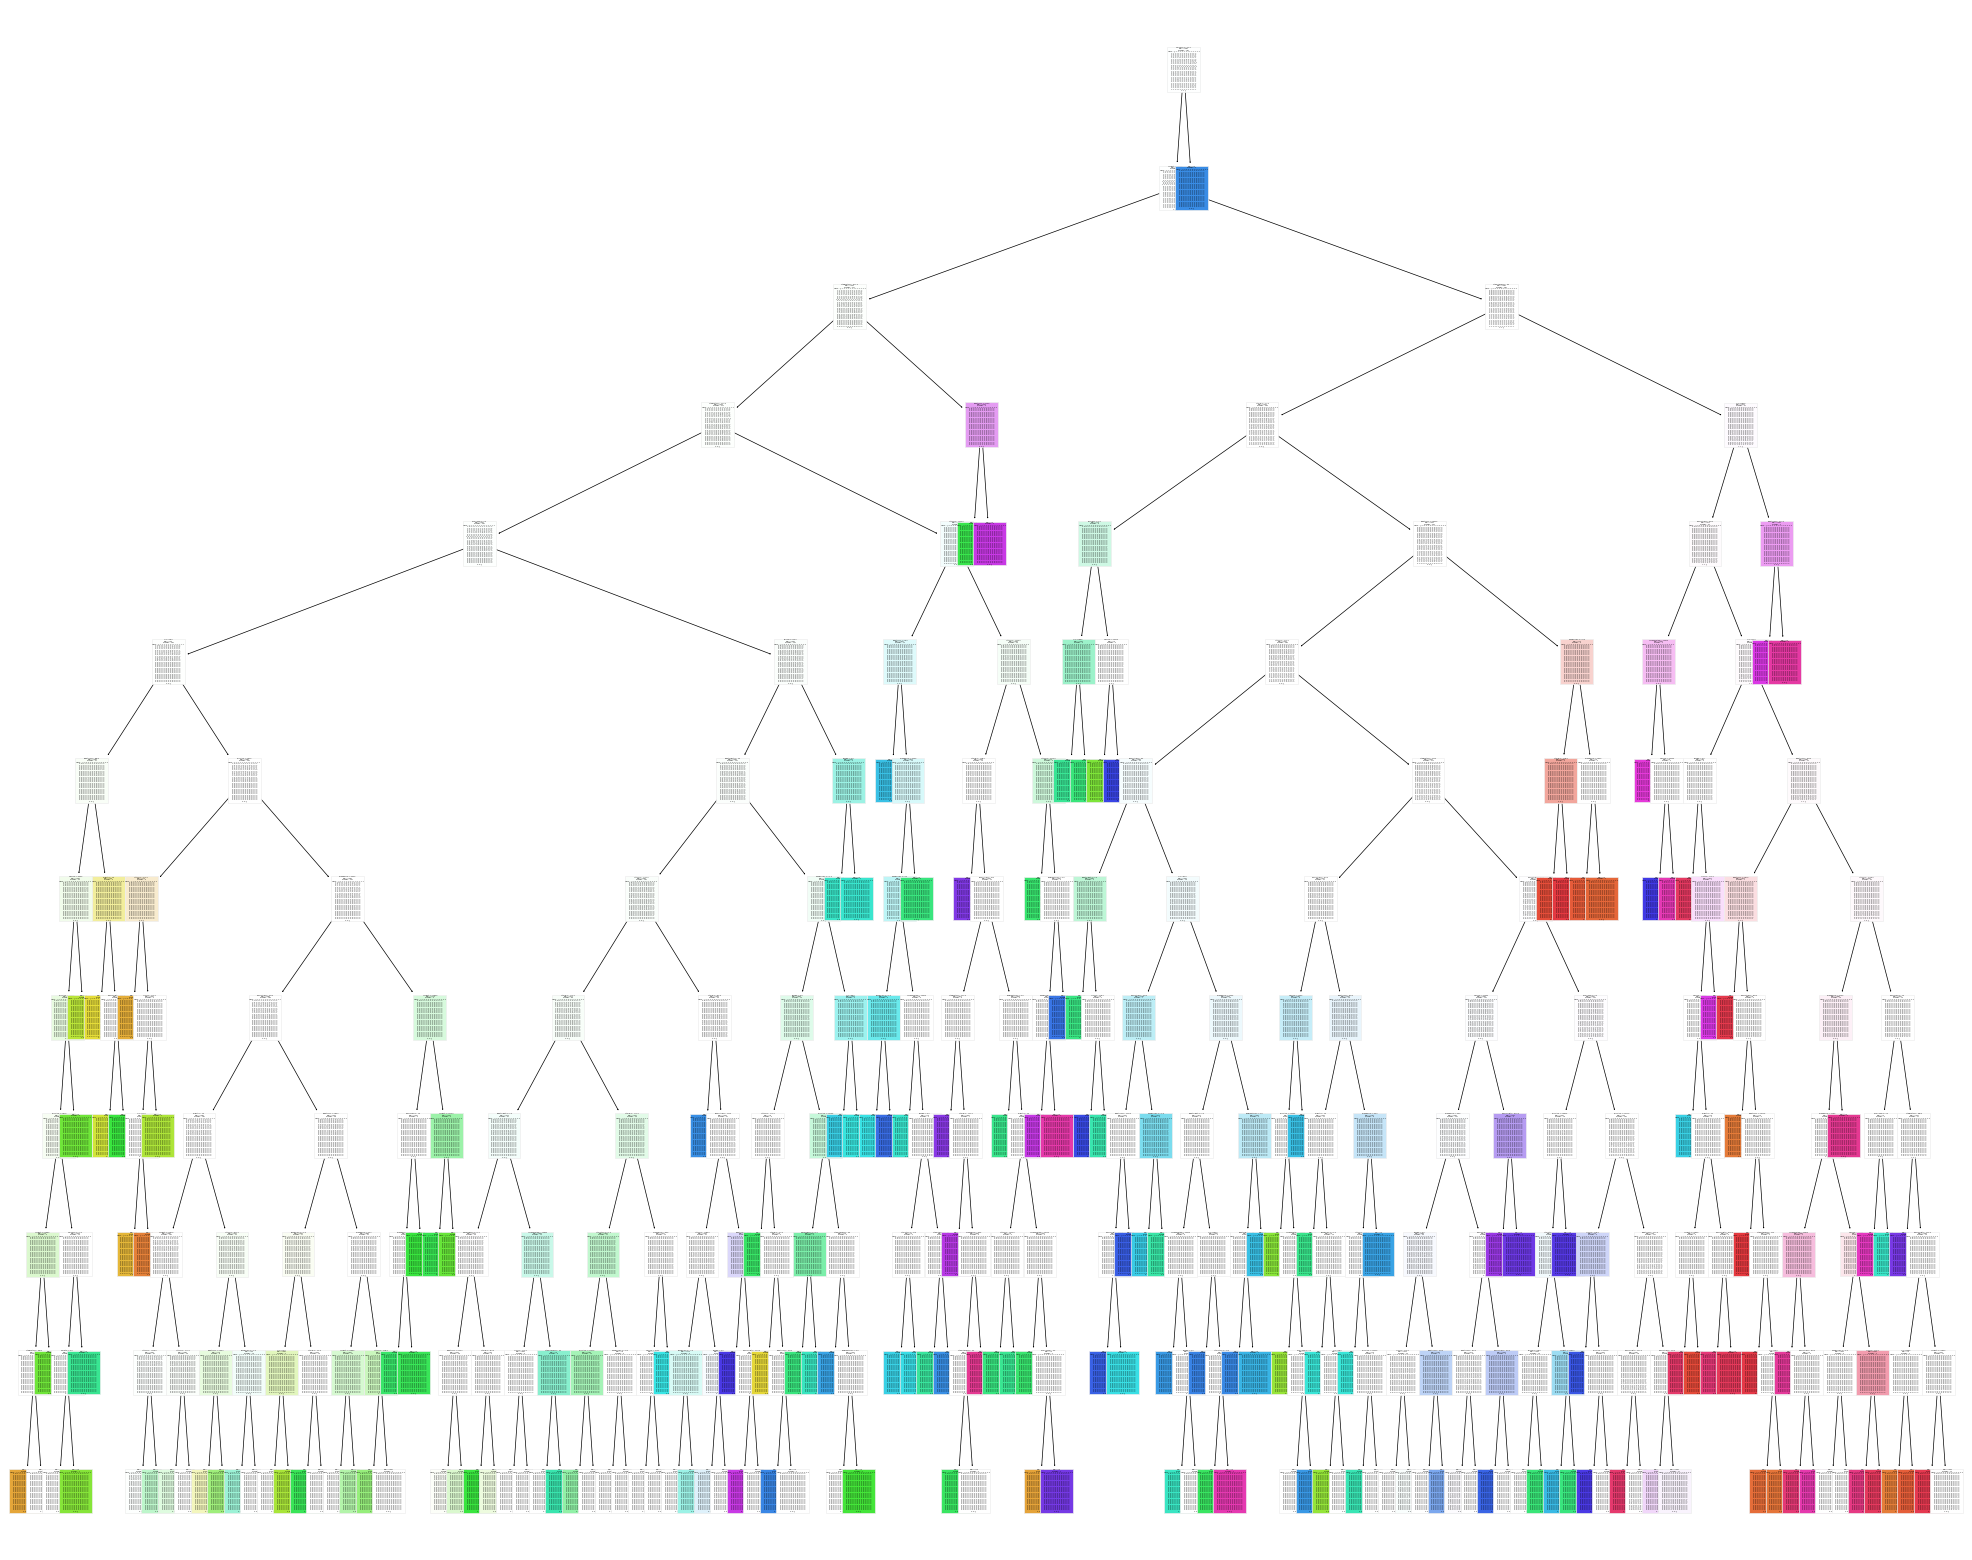

In [53]:
test_arbol2 = DecisionTreeClassifier(max_depth=12, random_state=42 ) 
test_arbol2 = test_arbol2.fit(X_train, y_train) 

text_representation = tree.export_text(test_arbol2)

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(arbol,feature_names=X.columns, filled=True)

y_pred2 = test_arbol2.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print ("Precision:", metrics.precision_score(y_test,y_pred2,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred2,average='weighted', zero_division=0))

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(test_arbol2,feature_names=X.columns, filled=True)

Accuracy: 0.008902077151335312
Precision: 0.00023675737104615188
Recall:  0.008902077151335312


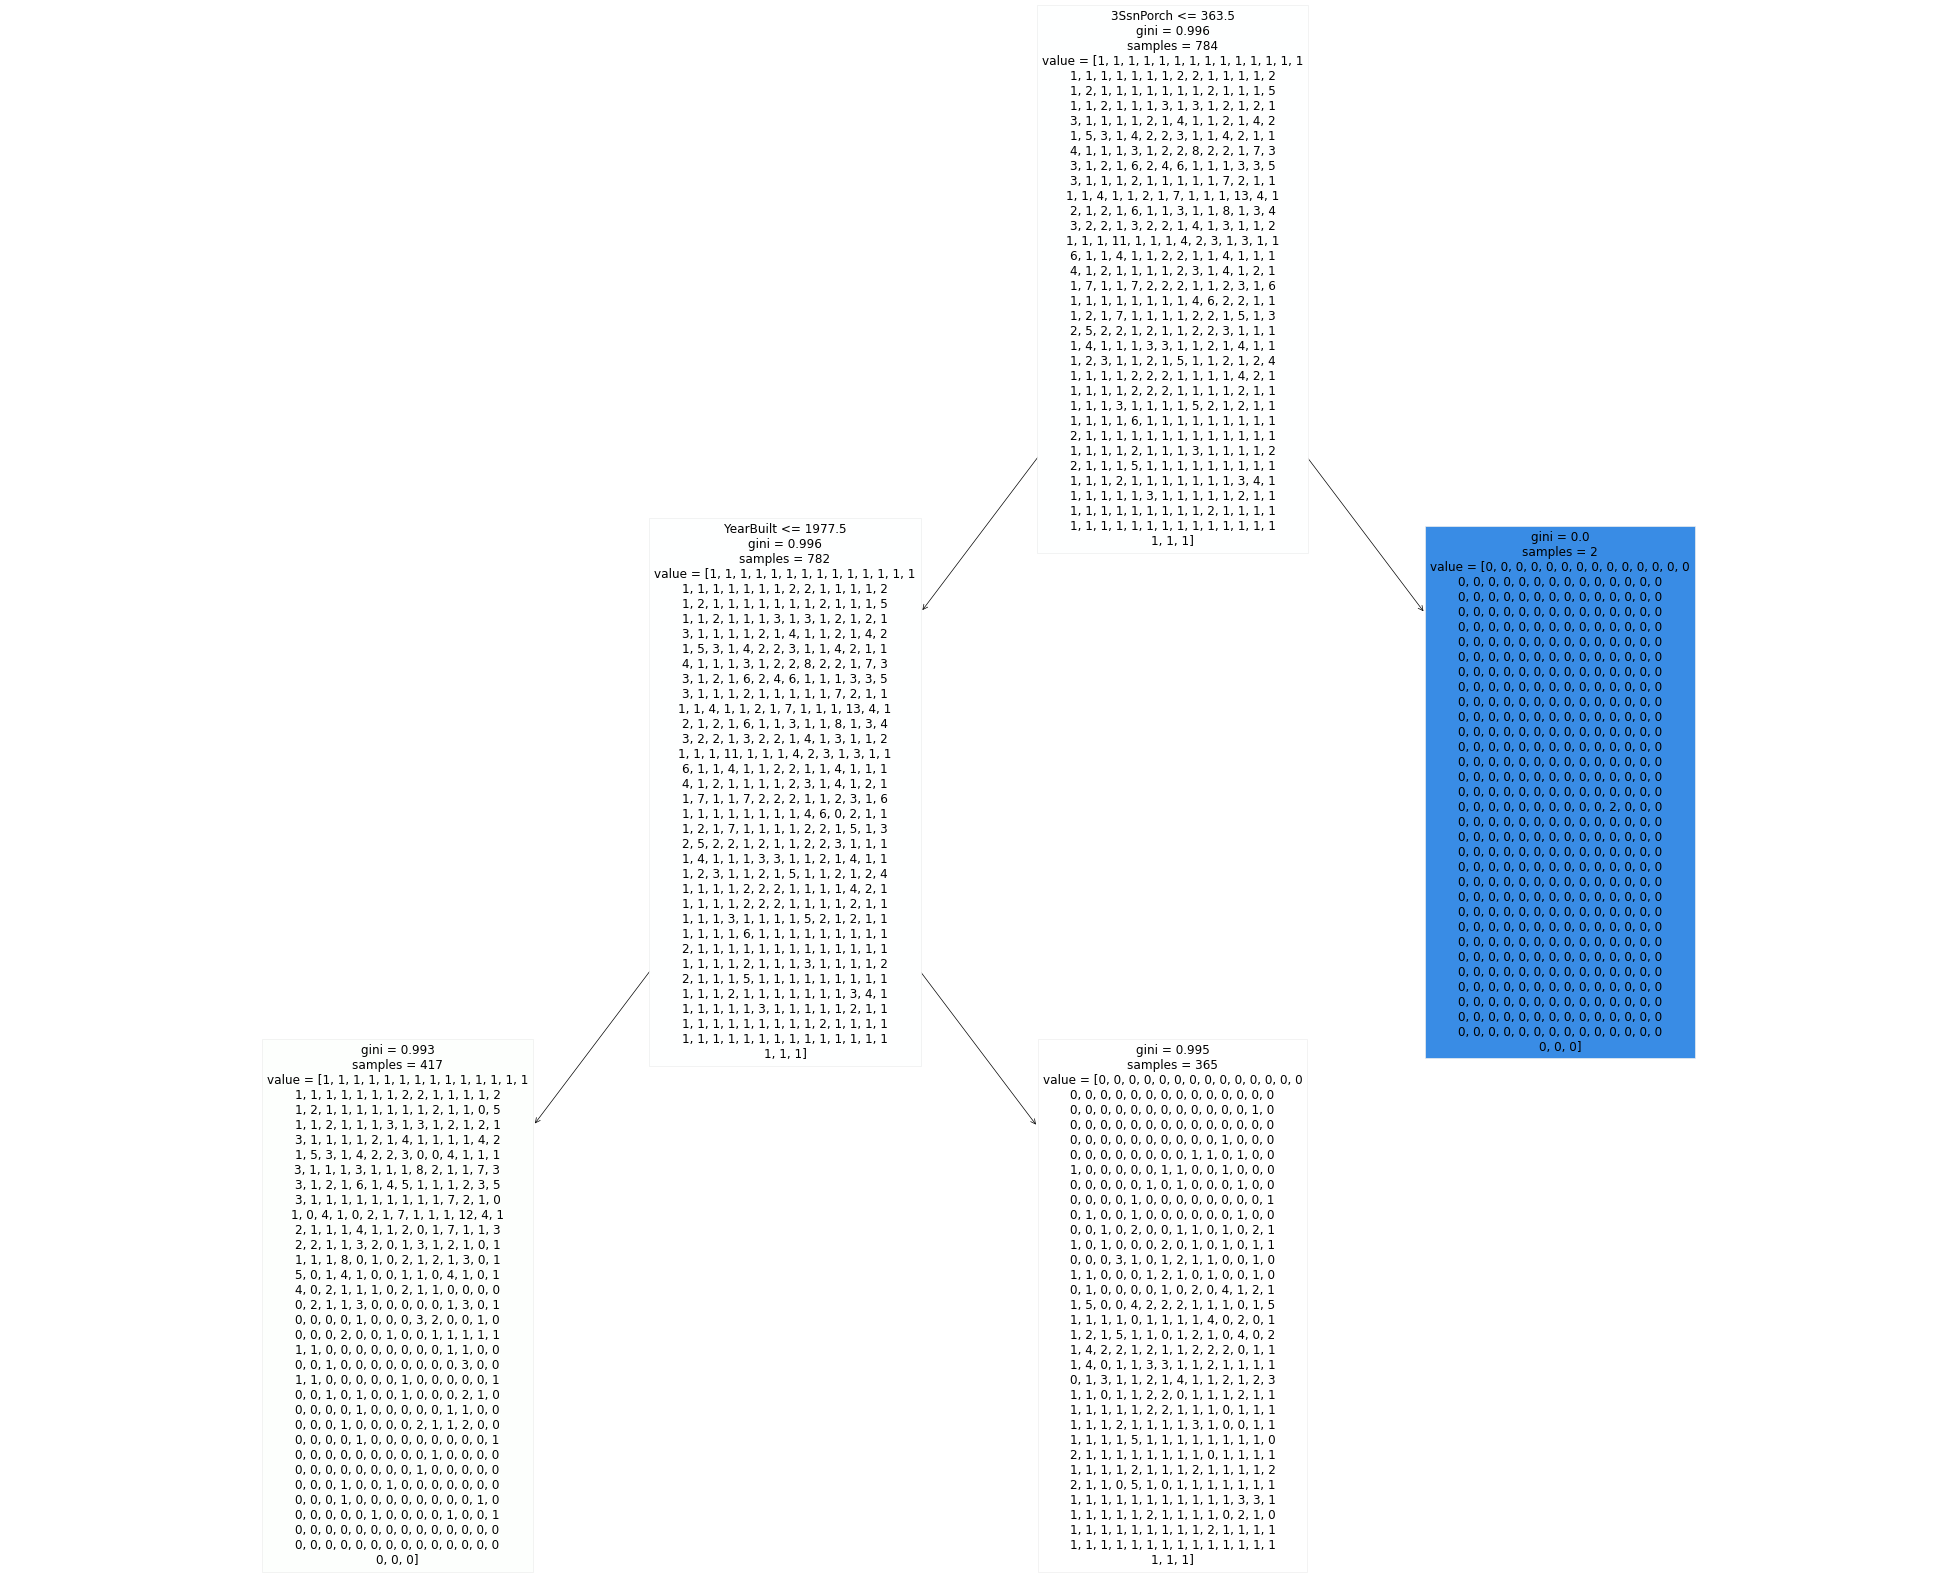

In [54]:
test_arbol2 = DecisionTreeClassifier(max_depth=2, random_state=42 ) 
test_arbol2 = test_arbol2.fit(X_train, y_train) 
text_representation = tree.export_text(test_arbol2)



y_pred2 = test_arbol2.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print ("Precision:", metrics.precision_score(y_test,y_pred2,average='weighted', zero_division=0) )
print ("Recall: ", metrics.recall_score(y_test,y_pred2,average='weighted', zero_division=0))

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(test_arbol2,feature_names=X.columns, filled=True)